### Import the necessary modules and utility functions

In [3]:
# import the required packages
from tensorflow.keras.applications import \
    ResNet50, \
    InceptionV3, \
    Xception, \
    VGG16, \
    VGG19, \
    imagenet_utils
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.preprocessing.image import \
    img_to_array, \
    load_img
import numpy as np
import cv2

### Initialise the image paths and model dicts

In [4]:
args = {
    'image': 'puppy.jpg',
    'model': 'vgg16'
}

Models = {
    'vgg16': VGG16,
    'vgg19': VGG19,
    'inception': InceptionV3,
    'xception': Xception,
    'resnet': ResNet50
}

# ensure a valid model name was supplied via command line argument
if args['model'] not in Models.keys():
    raise AssertionError(f'The --model command line argument should be a key'
                         f' in the models dict: {Models.keys()}')

### Preprocess image and load the model

In [5]:
# VGG16, VGG19, and ResNet all accept 224 ×224
# Inception V3 and Xception require 299 ×299 pixel inputs

# initialise the input image shape => 224x224 or 299x299 along with 
# preprocessing function

# for VGG16, VGG19 or ResNet
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

# for Inception V3 or Xception
if args['model'] in ('inception', 'xception'):
    inputShape = (299, 299)
    preprocess = inception_v3.preprocess_input    

In [6]:
# load network from disk
print(f'[INFO] loading {args["model"]}')
network = Models[args["model"]]
model = network(weights="imagenet")

# load the input image 
print(f'[INFO] loading and pre-process image...')
image = load_img(args['image'], target_size=inputShape)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess(image)

[INFO] loading vgg16
[INFO] loading and pre-process image...


### Make the predictions on a test image

In [7]:
# classify the image
print(f'[INFO] classifying the image with {args["model"]}')
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)

# write out the top 5 image classified and theor probabilities
for i, (imagenetID, label, prob) in enumerate(P[0]):
    print(f'{i+1}. {label}. {prob*100}')

[INFO] classifying the image with vgg16
1. golden_retriever. 78.86912226676941
2. Labrador_retriever. 7.9466961324214935
3. Great_Pyrenees. 5.392393842339516
4. kuvasz. 4.0157608687877655
5. Leonberg. 0.9253856725990772


### Display the classified image

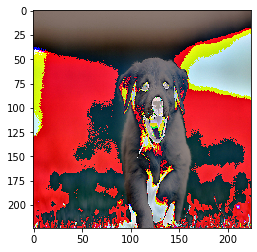

In [16]:
# display image with identified label
import matplotlib.pyplot as plt
puppy = np.asarray(image[0], dtype=np.uint8)
plt.imshow(puppy)